In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

## Load data

In [4]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
# y_test = np.load("y_test.npy")
# x_train[:10]


In [5]:
# 7000 data with 300 features
print(x_train.shape)
# y_train[:10]

(7000, 300)


In [6]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [10]:
def cross_validation(x_train, y_train, k=5):
  kfold_data = [[] for i in range(k)]
  candidate_list = np.arange(len(x_train))
  np.random.shuffle(candidate_list)
  fold_num_list = []
  if len(x_train) % k != 0:
    for i in range(len(x_train) % k):
      fold_num_list.append((len(x_train) // k) + 1)
    for j in range(k - i - 1):
      fold_num_list.append(len(x_train) // k)
  else:
    for i in range(k):
      fold_num_list.append(len(x_train) // k)

  current_kfold_start = 0
  for split in range(k):
    Validation_index = np.sort(candidate_list[current_kfold_start : current_kfold_start + fold_num_list[split]])
    Training_index = np.sort(np.delete(candidate_list, [i for i in range(current_kfold_start, current_kfold_start + fold_num_list[split])]))
    kfold_data[split].append(Training_index)
    kfold_data[split].append(Validation_index)
    current_kfold_start += fold_num_list[split]
  return kfold_data


In [11]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K
# print(kfold_data)


## example

In [13]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  2  3  4  5  7  9 10 11 12 13 14 15 16 17 19], Validation index: [ 1  6  8 18]
Split: 2, Training index: [ 0  1  2  3  4  6  7  8  9 10 11 12 14 15 16 18], Validation index: [ 5 13 17 19]
Split: 3, Training index: [ 0  1  2  3  5  6  7  8 10 12 13 14 16 17 18 19], Validation index: [ 4  9 11 15]
Split: 4, Training index: [ 1  3  4  5  6  7  8  9 11 12 13 15 16 17 18 19], Validation index: [ 0  2 10 14]
Split: 5, Training index: [ 0  1  2  4  5  6  8  9 10 11 13 14 15 17 18 19], Validation index: [ 3  7 12 16]


In [14]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [16]:
clf = SVC(C=1.0, kernel='rbf', gamma=0.01)
# print(clf)

In [27]:
## your code

best_score = -1
best_parameters = {}
best_parameters["gamma"] = '?'
best_parameters["C"] = '?'

splits = cross_validation(x_train, y_train, k=5)
Gamma_parameter = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001]
C_parameter = [0.1, 1, 10, 100, 1000, 10000, 100000]
accuracy_score_list = []
for temp_C in C_parameter:
  same_C_score_list = []
  for temp_gamma in Gamma_parameter: 
    split_scores=[]
    svm = SVC(C = temp_C,kernel = 'rbf',gamma = temp_gamma)
    # print(svm)
    for split in splits:
      train_fold = split[0]
      validation_fold = split[1]
      x_train_data = x_train[train_fold]
      y_train_data = y_train[train_fold]
      x_validation_data = x_train[validation_fold]
      y_validation_data = y_train[validation_fold]

      svm.fit(x_train_data, y_train_data)
      split_scores.append(svm.score(x_validation_data, y_validation_data))
        
    score = sum(split_scores) / len(split_scores)
    # print(score)
    same_C_score_list.append(score)
    if score > best_score:
        best_score = score
        best_parameters["gamma"] = temp_gamma
        best_parameters["C"] = temp_C
  accuracy_score_list.append(np.round(same_C_score_list, 2))
# print(best_parameters)
# print(accuracy_score_list)

In [28]:
print(best_parameters)
print("With accuracy score:", best_score)

{'gamma': 0.0001, 'C': 1}
With accuracy score: 0.9934285714285714


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

In [29]:
import matplotlib.pyplot as plt

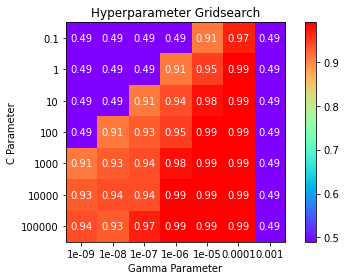

In [30]:
fig, ax = plt.subplots()

im = ax.imshow(accuracy_score_list, cmap="rainbow")
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(Gamma_parameter)))
ax.set_yticks(np.arange(len(C_parameter)))
ax.set_xticklabels(Gamma_parameter)
ax.set_yticklabels(C_parameter)

for i in range(len(C_parameter)):
    for j in range(len(Gamma_parameter)):
        text = ax.text(j, i, accuracy_score_list[i][j],
                       ha="center", va="center", color="w")

ax.set_title("Hyperparameter Gridsearch")
plt.xlabel("Gamma Parameter")
plt.ylabel("C Parameter")
fig.tight_layout()
plt.show()

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [37]:
# best_parameters = {'gamma': 0.0001, 'C': 1}
best_C = best_parameters["C"]
best_Gamma = best_parameters["gamma"]
best_model = SVC(C = best_C, kernel = 'rbf',gamma = best_Gamma)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)


In [38]:
y_pred = best_model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))

NameError: ignored